<a href="https://colab.research.google.com/github/ChaviPalma/Counter-strike-machine-learning/blob/main/Random_Forest_Counter_Strike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo Random Forest del Target MatchKills



Integrantes:

*   Gonzalo Gallardo
*   Bárbara Palma Mena

Docente: Giocrisrai Godoy

Sección: MLY0100 - 002D

## Importar librerias


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [1]:
#Montar drive en el Notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Llamar archivo desde el drive
file_path = "/content/drive/MyDrive/Machine Learning- Counter Strike/csgo_datos_limpios.csv"
csgo = pd.read_csv(file_path, sep=",")

<ipython-input-3-1a743843a119>:3: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  csgo = pd.read_csv(file_path, sep=",")


##Análisis estadístico básico




In [4]:
csgo.head()

,Map,Team,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,...,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,TotalGrenades,RoundDeaths,KDR
0,de_inferno,Terrorist,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,...,0,750,4400,0,0,0,0,4,1,0.0
1,de_inferno,Terrorist,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,...,0,800,4400,0,0,0,0,0,1,0.0
2,de_inferno,Terrorist,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,...,0,1000,4400,0,0,0,0,0,1,0.0
3,de_inferno,Terrorist,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,...,0,850,4400,0,0,0,0,0,1,0.0
4,de_inferno,Terrorist,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,...,0,1000,4400,0,0,0,0,2,0,0.0


In [5]:
csgo.columns.tolist()

['Map',
 'Team',
 'RoundId',
 'RoundWinner',
 'MatchWinner',
 'Survived',
 'AbnormalMatch',
 'TimeAlive',
 'TravelledDistance',
 'RLethalGrenadesThrown',
 'RNonLethalGrenadesThrown',
 'PrimaryAssaultRifle',
 'PrimarySniperRifle',
 'PrimaryHeavy',
 'PrimarySMG',
 'PrimaryPistol',
 'FirstKillTime',
 'RoundKills',
 'RoundAssists',
 'RoundHeadshots',
 'RoundFlankKills',
 'RoundStartingEquipmentValue',
 'TeamStartingEquipmentValue',
 'MatchKills',
 'MatchFlankKills',
 'MatchAssists',
 'MatchHeadshots',
 'TotalGrenades',
 'RoundDeaths',
 'KDR']

In [6]:
csgo.describe().T

,count,mean,std,min,25%,50%,75%,max
RoundId,79157.0,12.765517,7.432837,1.0,6.0,12.0,19.0,36.0
RLethalGrenadesThrown,79157.0,0.498667,0.597985,0.0,0.0,0.0,1.0,4.0
RNonLethalGrenadesThrown,79157.0,1.258057,1.184909,0.0,0.0,1.0,2.0,6.0
PrimaryAssaultRifle,79157.0,0.675363,0.464125,0.0,0.0,1.0,1.0,1.0
PrimarySniperRifle,79157.0,0.089840,0.279797,0.0,0.0,0.0,0.0,1.0
PrimaryHeavy,79157.0,0.005964,0.075497,0.0,0.0,0.0,0.0,1.0
PrimarySMG,79157.0,0.007046,0.082453,0.0,0.0,0.0,0.0,1.0
PrimaryPistol,79157.0,0.221787,0.415451,0.0,0.0,0.0,0.0,1.0
RoundKills,79157.0,0.671349,0.881798,0.0,0.0,0.0,1.0,5.0
RoundAssists,79157.0,0.146178,0.385601,0.0,0.0,0.0,0.0,4.0


### Selección de Target y predictor

In [8]:
# Elegimos como target 'MatchKills' porque representa el rendimiento general del jugador.
target = 'MatchKills'

# Elegimos varias variables predictoras clave que influyen directamente en el rendimiento:
# - MatchHeadshots: indica precisión y efectividad.
# - MatchFlankKills: muestra la capacidad táctica del jugador.
# - MatchAssists: mide el apoyo al equipo.
# - MatchDeaths: permite balancear la agresividad y supervivencia.
# - RoundId: referencia la duración o etapa de la partida.
predictors = ['MatchHeadshots', 'MatchFlankKills', 'MatchAssists', 'MatchFlankKills', 'RoundId']

# Crear los conjuntos de variables predictoras (X) y el objetivo (y)
X = csgo[predictors]
y = csgo[target]

print(X)
print(y)


       MatchHeadshots  MatchFlankKills  MatchAssists  MatchFlankKills  RoundId
0                   0                0             0                0        1
1                   0                0             0                0        1
2                   0                0             0                0        1
3                   0                0             0                0        1
4                   0                0             0                0        1
...               ...              ...           ...              ...      ...
79152               2                0             2                0        5
79153               3                5             1                5        5
79154               3                0             2                0        5
79155               0                0             1                0        5
79156               2                1             1                1        5

[79157 rows x 5 columns]
0        0
1        0
2   

## Dividiendo el csv para entrenamiento y pruebas

In [9]:
#Con test_size se divide 20% para pruebas y 80% entrenamiento
#Random_state garantiza que la partición sea la misma cada vez que se ejecute el notebook si se usa el mismo número en este caso 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Crear el modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

##Evaluación del modelo

In [12]:
# Se generan las predicciones del modelo usando el conjunto de prueba
# Usando múltiples variables predictoras para estimar MatchKills
y_pred = rf_model.predict(X_test)

# Calcula el MAE: mide en promedio cuánto se equivoca el modelo (error absoluto medio)
mae = mean_absolute_error(y_test, y_pred)

# Calcula el RMSE: penaliza más los errores grandes (raíz del error cuadrático medio)
rmse = mean_squared_error(y_test, y_pred)

# Calcula el R²: mide qué tan bien el modelo explica la variabilidad de MatchKills
r2 = r2_score(y_test, y_pred)

# Se imprimen las métricas de evaluación con formato amigable
print(f"MAE:  {mae:.2f}")   # Error absoluto promedio
print(f"RMSE: {rmse:.2f}")  # Error cuadrático medio (raíz)
print(f"R²:   {r2:.3f}")    # Coeficiente de determinación


MAE:  1.95
RMSE: 7.24
R²:   0.813


## Visualización del modelo


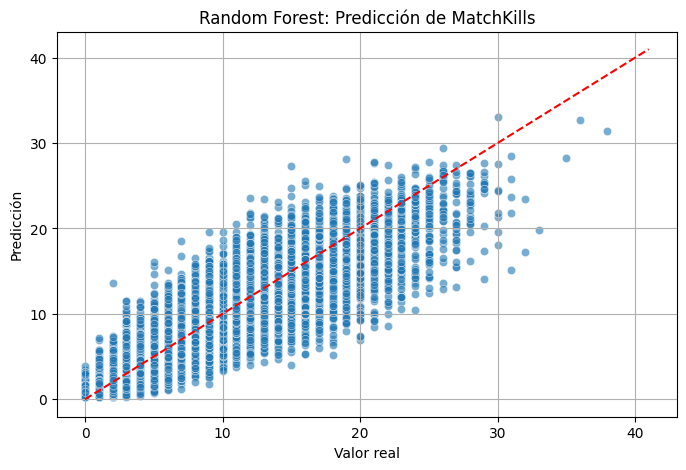

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Random Forest: Predicción de MatchKills")
plt.grid(True)
plt.show()


## Conclusión

**Métricas**

MAE(1.95)= En promedio el modelo se equivoca en menos de 2 Kills, por lo cual es un buen resultado, indicando que existe una precisión aceptable en las predicciones individuales.

RMSE(7.24)= Muestra que existen unos errores bastante grandes que penalizan el modelo, pero sigue siendo mejor que el árbol de decisión.

R² (0.813)= El modelo explica el 81.3% de la variabilidad en las Kills. Es una buena puntuación, superando al árbol de decisión y acercandose a la de regresión lineal múltiple.

**Análisis visual**

* La mayoría de los puntos estan alineados de buena manera a lo largo de la línea roja que seria la línea ideal, lo que indica que el modelo hace una predición con buena precisión.
*   Se observa una ligera dispersión en valores más alto lo que demostraria que tiene outliers, pero es normal en modelos reales.
* El patrón general que sugiere el modelo Random Forest logra capturar de buena manera la relación entre las variables predictorias y MatchKills.



